# 00 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import pickle

from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
def hangul():
    # 한글 폰트 사용을 위해서 세팅
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

In [3]:
os.chdir("c:/머신러닝/미니프로젝트/데이터")
print(os.getcwd())

c:\머신러닝\미니프로젝트\데이터


In [4]:
# Load variables #
# 전처리 완료된 학습/테스트 데이터 바로 불러오기 #
with open('sample2.pickle', 'rb') as pic:
    train_df, test_df = pickle.load(pic)

In [5]:
train_df

,글번호,제목,작성일,분류,내용,부서의견,contents,tokens,all_tokens
0,150587,횡단보도 사각지대 반사경,2012-10-30,교통,운전을 하다보면 횡단보도 주변에 적치물들 때문에 사각지대가 형성되어 사람이 보이지 ...,"좋은 제안 주신 whatsmatter 님께 감사드리며, 제안을 검토한 결과를 다음과...",횡단보도 사각지대 반사경\n운전을 하다보면 횡단보도 주변에 적치물들 때문에 사각지대...,"[횡단보도, 사각지대, 반사경, 운전, 횡단보도, 적치, 물, 사각지대, 형성, 때...","[횡단보도, 사각지대, 반사경, 운전, 하, 보, 면, 횡단보도, 에, 적치, 물,..."
1,150594,자전거 횡단보도 내려서 끌고가기,2012-10-30,교통,자전거 횡단보도와 자전거 표지를 보면 마치 자전거를 타고 건너도 되는 것처럼 보이고...,- 말씀하신 제안에는 충분히 공감합니다. 다만 교통안전표지(노면표시)는 도로교통법상...,자전거 횡단보도 내려서 끌고가기\n자전거 횡단보도와 자전거 표지를 보면 마치 자전거...,"[자전거, 횡단보도, 내리다, 끌다, 자전거, 횡단보도, 자전거, 표지, 마치, 자...","[자전거, 횡단보도, 내리, 어서, 끌, 고, 가, 기, 자전거, 횡단보도, 와, ..."
2,150597,범죄예방을 위한 투도어현관보조문 설치,2012-10-30,주택,- 주민을 위하여 노력하시는 직원여러분께 감사드립니다 - 아파트및 다세대 등 홀로 ...,"000님 안녕하세요? 000님께서 공동주택(아파트, 다세대, 연립)의 현관문에 1인...",범죄예방을 위한 투도어현관보조문 설치\n- 주민을 위하여 노력하시는 직원여러분께 감...,"[범죄, 예방, 위하다, 도어, 현관, 보조, 문, 설치, 주민, 위하다, 노력, ...","[범죄, 예방, 위하, ㄴ, 투, 도어, 현관, 보조, 문, 설치, 주민, 위하, ..."
3,150659,각각 집마다 간이소화기를 만들어 배치하는 것을 의무로 하였으면 좋겠습니다.,2012-10-31,안전,어제 어린 남매 두명이 집에 전자렌지로 인해 불이나서중태에 빠졌다는 기사를 보았습니...,기시행중임 -소방시설설치유지 및 안전관리에 관한 법률 제8조제1항 및 서울특별시 주...,각각 집마다 간이소화기를 만들어 배치하는 것을 의무로 하였으면 좋겠습니다.\n어제 ...,[],[각각 집마다 간이소화기를 만들어 배치하는 것을 의무로 하였으면 좋겠습니다어제 어린...
4,150660,예식장내 부대시설인 음식점의 횡포를...,2012-10-31,경제,자녀의 결혼등으로 인한 예식이나 회갑 칠순등으로 인하여 웨딩홀이나 호텔등을 이용시에...,안녕하십니까? 우리시정에 큰 관심을 보내주신 데 대하여 깊은 감사드립니다. dski...,예식장내 부대시설인 음식점의 횡포를...\n자녀의 결혼등으로 인한 예식이나 회갑 칠...,"[예식장, 부대시설, 음식점, 횡포, 자녀, 결혼, 예식, 회갑, 웨딩, 홀, 호텔...","[예식장, 내, 부대시설, ㄴ, 음식점, 의, 횡포, 를, 자녀, 의, 결혼, 등,..."
...,...,...,...,...,...,...,...,...,...
9837,179105,"버스 노약자보호석을 내리는 문이 보이는곳, 내리는문에 가까운 곳에 지정",2017-08-31,교통,보통 버스안에 보면 노약자 보호석은 타는 쪽 좌석에 지정되어 있고 내리는 문에서는 ...,NaN,"버스 노약자보호석을 내리는 문이 보이는곳, 내리는문에 가까운 곳에 지정\n보통 버스...","[버스, 노약자, 보호, 석, 내리다, 문, 곳, 내리다, 문, 가깝다, 곳, 지정...","[버스, 노약자, 보호, 석, 내리, 는, 문, 보이, 는, 곳, 내리, 는, 문,..."
9838,179106,지하철 임산부 지정석 관련,2017-08-31,교통,안녕하세요 수고하십니다.다름이 아니오라 지하철 임산부지정석 관련 건의 드립니다.현...,김혁님 안녕하십니까? 제안 참여에 감사드리며 “지하철 임산부 지정석”건에 대하여 답...,지하철 임산부 지정석 관련\n안녕하세요 수고하십니다.다름이 아니오라 지하철 임산부...,"[지하철, 임산부, 지정석, 다르다, 오라, 지하철, 임산부, 지정석, 건의, 드리...","[지하철, 임산부, 지정석, 하, 시, ㅂ니다, 다르, ㅁ, 아니, 오라, 지하철,..."
9839,179107,채동선 작곡가의 서울 집을 보존해 주세요.,2017-08-31,문화,서울 성북동의 옛날짜장면집 뒷 골목에 한옥집들 사이로 고풍스러운 2층 적산가옥이 보...,NaN,채동선 작곡가의 서울 집을 보존해 주세요.\n서울 성북동의 옛날짜장면집 뒷 골목에 ...,"[동서, 작곡가, 집, 보존, 성북동, 옛날, 짜장면, 집, 뒤, 골목, 한옥, 집...","[채, 동서, ㄴ, 작곡가, 의, 집, 보존, 하, 아, 주, 시, 어요, 성북동,..."
9840,179108,한강및 지천에서의 안전,2017-08-31,환경,시민의 안전과 편의를 위하여 불철주야 수고 하심에 감사드립니다.저는 주로 한강및 한...,NaN,한강및 지천에서의 안전\n시민의 안전과 편의를 위하여 불철주야 수고 하심에 감사드립...,"[한강, 및, 지천, 안전, 시민, 안전, 편의, 위하다, 불철주야, 감사드리다, ...","[한강, 및, 지천, 에서, 의, 안전, 시민, 의, 안전, 과, 편의, 를, 위하..."


In [6]:
test_df

,제안번호,제안제목,제안내용,제안등록일자,contents,tokens,all_tokens
0,192222,북부 직업훈련원 본부 장애인 화장실 문고리 중앙으로,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 22:40:32,북부 직업훈련원 본부 장애인 화장실 문고리 중앙으로,"[북부, 직업, 훈련원, 본부, 장애인, 화장실, 문고리, 중앙]","[북부, 직업, 훈련원, , 본부, 장애인, 화장실, , 문고리, 중앙, 으로]"
1,192221,수도요금 고지서를 개선하여 시민들에게 납부편의(식별용이)를 제공해 주세요!,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 22:22:22,수도요금 고지서를 개선하여 시민들에게 납부편의(식별용이)를 제공해 주세요!,"[수도, 요금, 고지서, 시민, 납부, 편의, 식별, 용이]","[수도, 요금, 고지서, 를, 하, 아, 시민, 들, 에게, 납부, 편의, 식별, ..."
2,192220,환경미화원 안전과 인권을 위해 작업시간 변경을 요청합니다,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 19:10:58,환경미화원 안전과 인권을 위해 작업시간 변경을 요청합니다,"[환경미화, 안전, 인권, 위하다, 작업, 변경]","[환경미화, 원, 안전, 과, 인권, 위하, 아, 작업, 변경, 하, ㅂ니다]"
3,192219,비리가 없는 공무직 채용으로 바꿔주세요,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 18:20:48,비리가 없는 공무직 채용으로 바꿔주세요,"[비리, 공무, 채용, 바꾸다]","[비리, 가, 없, 는, 공무, 직, 채용, 으로, 바꾸, 어, 주, 시, 어요]"
4,192218,희년제도부활 희년자유경제특구개발130. 5개년,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 07:29:25,희년제도부활 희년자유경제특구개발130. 5개년,"[희년, 부활, 희년, 자유, 경제특구, 개발]","[희년, 제, 도, 부활, 희년, 자유, 경제특구, 개발, 130, 5, 개년]"
...,...,...,...,...,...,...,...
4883,186616,코로나로 인해 사회멈춤이 해결방안이 맞나요,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 10:14:32,코로나로 인해 사회멈춤이 해결방안이 맞나요,"[코로나, 사회, 멈추다, 해결방안, 맞다]","[코로나, 로, 인하, 아, 사회, 멈추, ㅁ, 해결방안, 맞, 나요]"
4884,186615,코로나 바이러스로 교회예배를 금지해주세요,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 10:00:19,코로나 바이러스로 교회예배를 금지해주세요,"[코로나, 바이러스, 교회, 예배, 금지]","[코로나, 바이러스, 로, 교회, 예배, 를, 금지, 하, 아, 주, 시, 어요]"
4885,186614,마스크 5부제 수량 증가 요청,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 09:58:25,마스크 5부제 수량 증가 요청,"[마스크, 수량, 증가]","[마스크, 5, 부제, 수량, 증가]"
4886,186613,콜센타인근학원휴강권고요청,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 09:56:02,콜센타인근학원휴강권고요청,"[콜, 센타, 인근, 학원, 휴강, 권고]","[콜, 센타, 인근, 학원, 휴강, 권고]"


# 민원 건당 단어 수 #
## Word2vec 모델 파라메터 값 설정에 참고될 통계량 ##

### 학습 데이터 ###

In [7]:
train_df['tokens'].str.len().describe()

count    9842.000000
mean      103.691933
std       104.520968
min         0.000000
25%        47.000000
50%        77.000000
75%       127.000000
max      3364.000000
Name: tokens, dtype: float64

### 테스트 데이터 ###

In [8]:
test_df['tokens'].str.len().describe()

count    4814.000000
mean        5.233486
std         2.978194
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        85.000000
Name: tokens, dtype: float64

# 01 Word2vec 모델링 #
## 코드 참고 : https://programmers.co.kr/learn/courses/21

## Word2vec 파라미터 값 지정 ##

In [10]:
train = pd.read_csv('train.csv',sep='\t')
test = pd.read_csv('민주주의 서울 자유제안 정보_20_22.csv',encoding='cp949')

In [11]:
train_documents = train_df['tokens'].to_list() # 학습데이터 토크나이징 완료한 문서
test_documents = test_df['tokens'].to_list() # 학습데이터 토크나이징 완료한 문서

In [18]:
num_features = 500 # 문자 벡터 차원 수
min_word_count = 10 # 최소 문자 수 (등장빈도 10회 이하인 단어는 취급 X)
num_workers = 6 # 병렬 처리 스레드 수
context = 20 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도수 Downsample

## 모델 학습 ##

In [19]:
# 문장을 이용하여 단어와 벡터를 생성한다.
model = word2vec.Word2Vec(train_documents,
                          workers=num_workers, 
                          vector_size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

2022-03-11 09:10:19,774 : INFO : collecting all words and their counts
2022-03-11 09:10:19,774 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-11 09:10:19,991 : INFO : collected 28790 word types from a corpus of 1020536 raw words and 9842 sentences
2022-03-11 09:10:19,991 : INFO : Creating a fresh vocabulary
2022-03-11 09:10:20,072 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 9033 unique words (31.375477596387636%% of original 28790, drops 19757)', 'datetime': '2022-03-11T09:10:20.072283', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
2022-03-11 09:10:20,072 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 leaves 965969 word corpus (94.65310385914853%% of original 1020536, drops 54567)', 'datetime': '2022-03-11T09:10:20.072283', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 1

In [20]:
# 모델 확인
model

### 특정 단어와 가장 유사한 단어 추출 ###

In [25]:
model.wv.most_similar('자전거')

[('자전', 0.8271397352218628),
 ('따릉이', 0.7933324575424194),
 ('공공자전거', 0.7899010181427002),
 ('도난', 0.786166250705719),
 ('자전거도로', 0.7291296720504761),
 ('주입기', 0.7019433975219727),
 ('거치', 0.684582531452179),
 ('대여소', 0.6806490421295166),
 ('펑크', 0.6782065033912659),
 ('보관대', 0.6568393707275391)]

In [64]:
model.wv.most_similar('바이러스')

[('면역력', 0.9048550128936768),
 ('감염', 0.9042322635650635),
 ('질병', 0.8655791878700256),
 ('감기', 0.8641196489334106),
 ('호흡기', 0.8595758676528931),
 ('전염', 0.8592144846916199),
 ('약물', 0.8470553755760193),
 ('증상', 0.8232318758964539),
 ('증후군', 0.809160590171814),
 ('질환', 0.8080140352249146)]

In [67]:
model.wv.most_similar('차')

[('트럭', 0.780640721321106),
 ('밀리다', 0.7682144641876221),
 ('승합차', 0.7646933794021606),
 ('훨', 0.7615028023719788),
 ('차량', 0.7526183128356934),
 ('경적', 0.7380327582359314),
 ('뒤', 0.7241901159286499),
 ('몰다', 0.7130261659622192),
 ('앞차', 0.7105354070663452),
 ('끼어들다', 0.7093767523765564)]

### 입력한 복수의 단어 中 유사하지 않은 단어 추출 ###

In [26]:
model.wv.doesnt_match('자전거 버스 택시'.split())

'자전거'

In [27]:
model.wv.doesnt_match('임산부 노인 시민'.split())

'시민'

In [42]:
model.wv.doesnt_match('코로나 감기 바이러스'.split())

2022-03-11 09:15:46,903 : WARNING : vectors for words {'코로나'} are not present in the model, ignoring these words


'감기'

### 학습 완료 후 필요없는 메모리 unload ###

In [28]:
model.init_sims(replace=True)

C:\Users\dkq50\AppData\Local\Temp/ipykernel_21756/1992334471.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)
2022-03-11 09:11:07,125 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency


### 모델 저장 ###

In [29]:
model_name = '500features_40minwords_20context2' #모델 이름 지정
model.save(f'./{model_name}')

2022-03-11 09:11:20,739 : INFO : Word2Vec lifecycle event {'fname_or_handle': './500features_40minwords_20context2', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-03-11T09:11:20.739665', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'saving'}
2022-03-11 09:11:20,747 : INFO : not storing attribute cum_table
2022-03-11 09:11:20,779 : INFO : saved ./500features_40minwords_20context2


### 모델 로드

In [30]:
# 추후 필요할 때 활용
model = word2vec.Word2Vec.load('./500features_40minwords_20context2')

2022-03-11 09:11:25,961 : INFO : loading Word2Vec object from ./500features_40minwords_20context2
2022-03-11 09:11:25,985 : INFO : loading wv recursively from ./500features_40minwords_20context2.wv.* with mmap=None
2022-03-11 09:11:25,985 : INFO : setting ignored attribute cum_table to None
2022-03-11 09:11:26,063 : INFO : Word2Vec lifecycle event {'fname': './500features_40minwords_20context2', 'datetime': '2022-03-11T09:11:26.063635', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'loaded'}


### Word2Vec 모델

In [31]:
from gensim.models import Word2Vec

# 단어벡터를 구한다.
word_vectors = model.wv

vocabs= word_vectors.key_to_index.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

### 임베딩 결과 시각화
#### 1) PCA
300차원 벡터를 시각화하기 위해서는 2차원 혹은 3차원으로 벡터를 축소하는 과정이 필요합니다. 이런 방식을 '차원 축소'라고 부르고, PCA는 대표적인 차원 축소 방식 중 하나 입니다. 

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list[:100])
xs = xys[:,0]
ys = xys[:,1]

사이킷런의 PCA 모듈을 이용했다. n_components는 input 데이터를 몇 차원으로 축소시킬 것인지를 의미합니다. 2차원 벡터의 x 값은 xs에, y 값은 ys에 저장했습니다.

In [33]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(15 ,10))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(list(vocabs)[:100]):
        plt.annotate(v, xy=(xs[i], ys[i]))

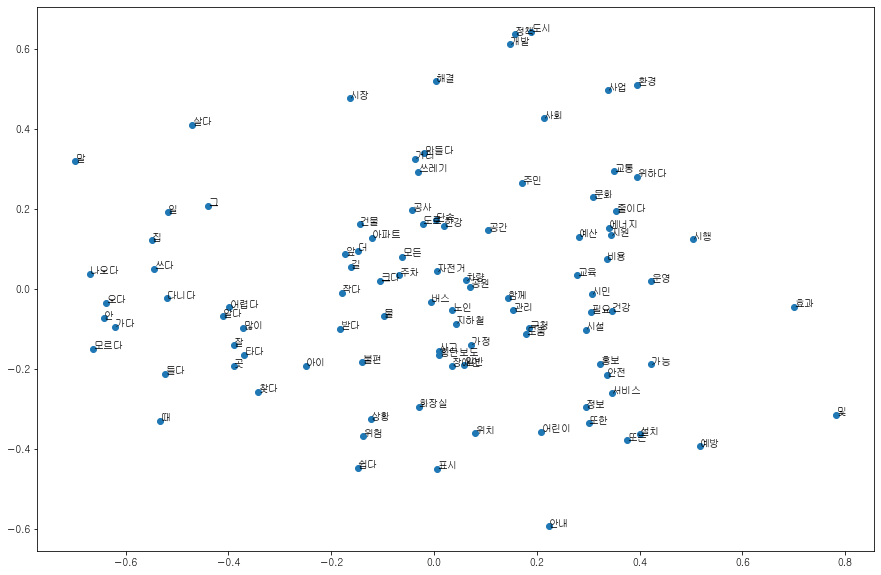

In [34]:
hangul()
plot_2d_graph(vocabs, xs, ys)

많은 벡터가 가운데에 모여 있는 것을 확인할 수 있습니다. 300차원의 벡터를 2차원에 나타내다 보니 결과가 아주 우수하다고 보기는 어려움

#### 2) t-SNE
PCA가 자주 이용되는 차원 축소 방식이긴 하지만, 위의 결과와 같이 PCA는 군집의 변별력을 죽인다는 단점이 있습니다. (자세한 내용은 여기서 확인할 수 있다.) 이러한 단점을 개선한 방식이 t-SNE 차원축소 방식입니다. 실제로 임베딩 결과는 t-SNE로 나타내는 경우가 많습니다.

C:\Users\dkq50\anaconda3\envs\hamtori\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


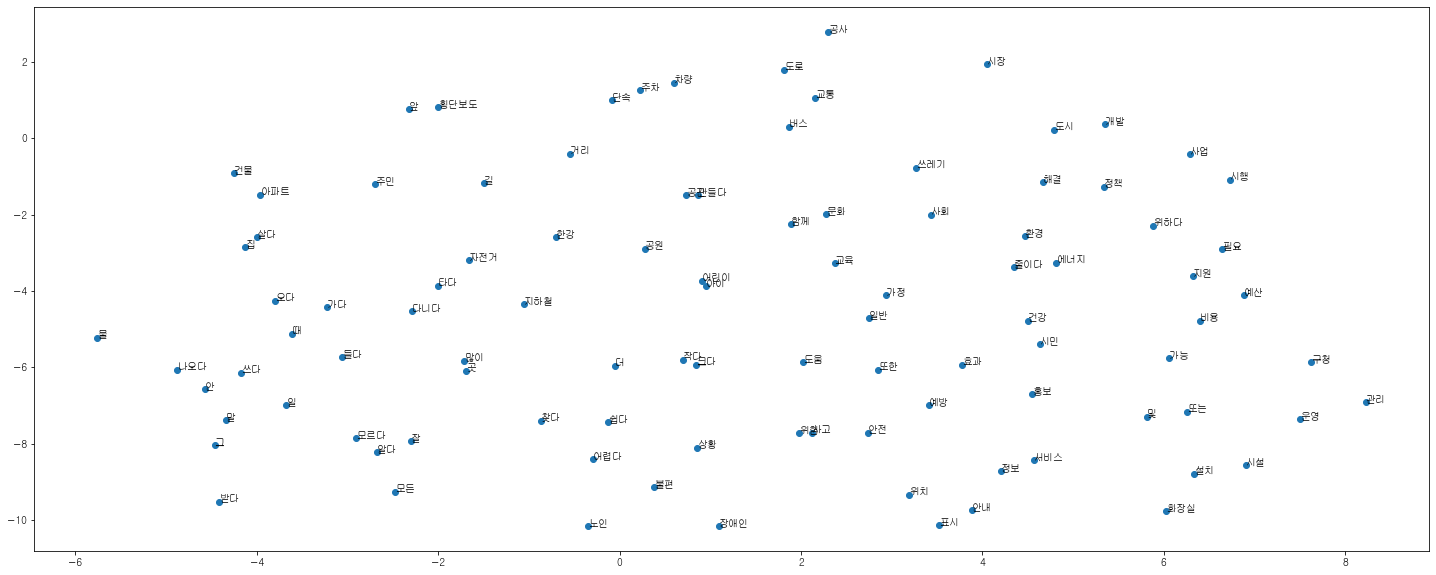

In [43]:
from sklearn.manifold import TSNE

model2 = TSNE(learning_rate=100)
transformed = model2.fit_transform(word_vectors_list[:100])

xs2 = transformed[:,0]
ys2 = transformed[:,1]

plt.figure(figsize=(25,10))

plt.scatter(xs2, ys2)
for i,v in enumerate(list(vocabs)[:100]):
    plt.annotate(v, xy=(xs2[i], ys2[i]))

plt.show()

In [44]:
from sklearn.manifold import TSNE

# 2차원 t-SNE 임베딩
model2 = TSNE(n_components=2)
transformed2 = model2.fit_transform(word_vectors_list[:100])

# 3차원 t-SNE 임베딩
model3 = TSNE(n_components=3)
transformed3 = model3.fit_transform(word_vectors_list)

# numpy array -> DataFrame 변환
tsne_df2 = pd.DataFrame(transformed2, columns = ['component 0', 'component 1'])
tsne_df3 = pd.DataFrame(transformed3, columns = ['component 0', 'component 1','component 2'])

C:\Users\dkq50\anaconda3\envs\hamtori\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\dkq50\anaconda3\envs\hamtori\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\dkq50\anaconda3\envs\hamtori\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\dkq50\anaconda3\envs\hamtori\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [37]:
set(train['분류'])

{nan, '건강', '경제', '교통', '문화', '복지', '세금', '안전', '여성', '주택', '환경'}

2차원

<민원 분류 개수> 
 교통    18
안전    15
건강    15
환경    13
문화    11
복지    10
주택     8
경제     6
여성     4
Name: target, dtype: int64


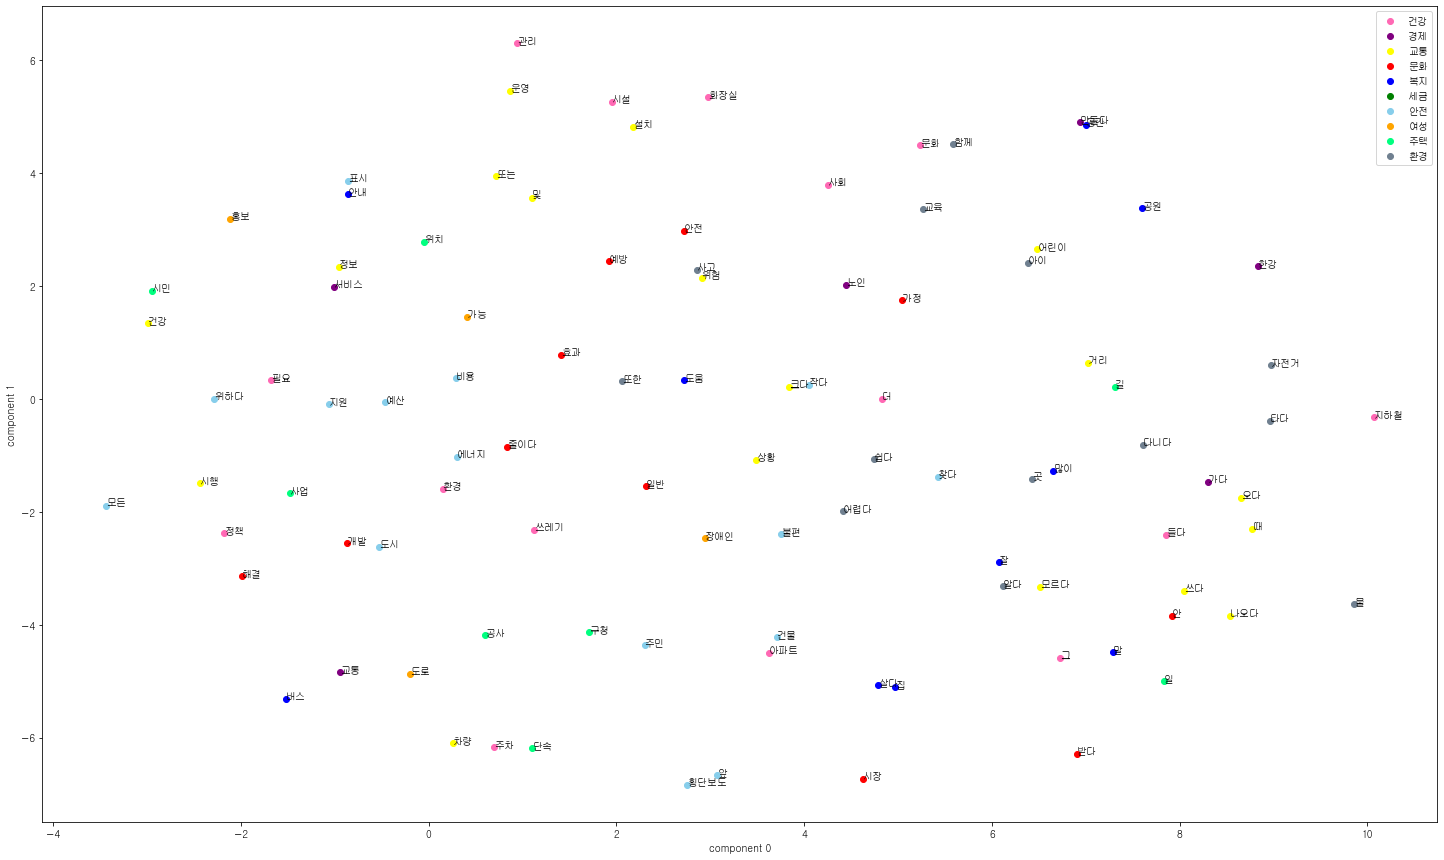

In [45]:
import matplotlib.pyplot as plt

tsne_df = tsne_df2
# class target 정보 불러오기 
tsne_df['target'] = train['분류']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '건강']
tsne_df_1 = tsne_df[tsne_df['target'] == '경제']
tsne_df_2 = tsne_df[tsne_df['target'] == '교통']
tsne_df_3 = tsne_df[tsne_df['target'] == '문화']
tsne_df_4 = tsne_df[tsne_df['target'] == '복지']
tsne_df_5 = tsne_df[tsne_df['target'] == '세금']
tsne_df_6 = tsne_df[tsne_df['target'] == '안전']
tsne_df_7 = tsne_df[tsne_df['target'] == '여성']
tsne_df_8 = tsne_df[tsne_df['target'] == '주택']
tsne_df_9 = tsne_df[tsne_df['target'] == '환경']


plt.figure(figsize=(25,15))
print('<민원 분류 개수> \n',tsne_df2['target'].value_counts())

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'hotpink', label = '건강')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = '경제')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = '교통')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'red', label = '문화')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'blue', label = '복지')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'green', label = '세금')
plt.scatter(tsne_df_6['component 0'], tsne_df_6['component 1'], color = 'skyblue', label = '안전')
plt.scatter(tsne_df_7['component 0'], tsne_df_7['component 1'], color = 'orange', label = '여성')
plt.scatter(tsne_df_8['component 0'], tsne_df_8['component 1'], color = 'springgreen', label = '주택')
plt.scatter(tsne_df_9['component 0'], tsne_df_9['component 1'], color = 'slategray', label = '환경')

for i,v in enumerate(list(vocabs)[:100]):
    plt.annotate(v, xy=(tsne_df2['component 0'][i], tsne_df2['component 1'][i]))




plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()


3차원

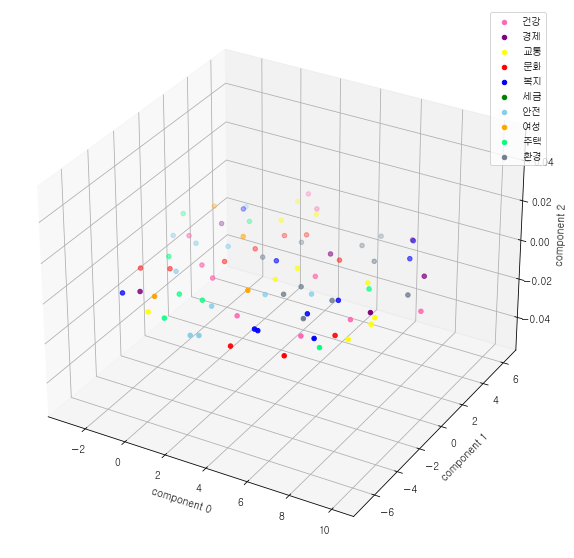

In [46]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['target'] = train['분류']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '건강']
tsne_df_1 = tsne_df[tsne_df['target'] == '경제']
tsne_df_2 = tsne_df[tsne_df['target'] == '교통']
tsne_df_3 = tsne_df[tsne_df['target'] == '문화']
tsne_df_4 = tsne_df[tsne_df['target'] == '복지']
tsne_df_5 = tsne_df[tsne_df['target'] == '세금']
tsne_df_6 = tsne_df[tsne_df['target'] == '안전']
tsne_df_7 = tsne_df[tsne_df['target'] == '여성']
tsne_df_8 = tsne_df[tsne_df['target'] == '주택']
tsne_df_9 = tsne_df[tsne_df['target'] == '환경']

# target 별 시각화
ax.scatter(tsne_df_0['component 0'][:10], tsne_df_0['component 1'][:10], color = 'hotpink', label = '건강')
ax.scatter(tsne_df_1['component 0'][:10], tsne_df_1['component 1'][:10], color = 'purple', label = '경제')
ax.scatter(tsne_df_2['component 0'][:10], tsne_df_2['component 1'][:10], color = 'yellow', label = '교통')
ax.scatter(tsne_df_3['component 0'][:10], tsne_df_3['component 1'][:10], color = 'red', label = '문화')
ax.scatter(tsne_df_4['component 0'][:10], tsne_df_4['component 1'][:10], color = 'blue', label = '복지')
ax.scatter(tsne_df_5['component 0'][:10], tsne_df_5['component 1'][:10], color = 'green', label = '세금')
ax.scatter(tsne_df_6['component 0'][:10], tsne_df_6['component 1'][:10], color = 'skyblue', label = '안전')
ax.scatter(tsne_df_7['component 0'][:10], tsne_df_7['component 1'][:10], color = 'orange', label = '여성')
ax.scatter(tsne_df_8['component 0'][:10], tsne_df_8['component 1'][:10], color = 'springgreen', label = '주택')
ax.scatter(tsne_df_9['component 0'][:10], tsne_df_9['component 1'][:10], color = 'slategray', label = '환경')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()


## 문서별 평균 feature 계산 ##

### 주어진 민원 문서에서 단어 벡터의 평균 구하는 함수 ###

In [47]:
def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,word_vectors[word])
    np.seterr(divide='ignore')
    featureVec = np.divide(featureVec,nwords)
    return featureVec

### 단어 평균 feature 벡터를 배열로 반환 ###

In [48]:
def getAvgFeatureVecs(documents, model, num_features):
    counter = 0.
    documentFeatureVecs = np.zeros(
        (len(documents),num_features),dtype="float32")
    for document in documents:
       if counter%2000. == 0.:
           print("민원 %d of %d" % (counter, len(documents)))
       documentFeatureVecs[int(counter)] = makeFeatureVec(document, model, num_features)
       counter = counter + 1.
    return documentFeatureVecs

### 학습 데이터 평균 feature 계산 ###

In [49]:
%time trainDataVecs = getAvgFeatureVecs(\
    train_documents, model, num_features)


민원 0 of 9842


C:\Users\dkq50\AppData\Local\Temp/ipykernel_21756/325302873.py:10: RuntimeWarning: invalid value encountered in true_divide
  featureVec = np.divide(featureVec,nwords)


민원 2000 of 9842
민원 4000 of 9842
민원 6000 of 9842
민원 8000 of 9842
Wall time: 5.75 s


In [50]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(trainDataVecs)
trainDataVecs=imp.transform(trainDataVecs) ##nan, infinite 제거

## 랜덤 포레스트로 민원 자동분류 ##

### 랜덤 포레스트 분류기 설정 ###
  - n_estimators : 생성할 트리 개수 (k)
  - n_jobs : 학습을 수행하기 위해 CPU 코어 2개를 병렬적으로 활용한다는 의미
  - 같은 결과를 만들어야 한다면 random_state 값을 고정해야함 

In [51]:
forest_w2v = RandomForestClassifier(n_estimators = 300, random_state=1, class_weight='balanced')

### 랜덤포레스트 모델 = Y: 민원분류, X:민원 문서당 평균 단어 feature ###

In [52]:
%time forest_w2v_fit = forest_w2v.fit(trainDataVecs, train_df["분류"])

Wall time: 53 s


### 최종 모델을 활용해서 테스트 데이터 민원 자동 분류 ###

In [54]:
# 테스트 데이터 벡터화
%time testDataVecs = getAvgFeatureVecs(\
        test_documents, model, num_features )
imp.fit(testDataVecs)
testDataVecs=imp.transform(testDataVecs) ##nan, infinite 제거

민원 0 of 4814


C:\Users\dkq50\AppData\Local\Temp/ipykernel_21756/325302873.py:10: RuntimeWarning: invalid value encountered in true_divide
  featureVec = np.divide(featureVec,nwords)


민원 2000 of 4814
민원 4000 of 4814
Wall time: 1.58 s


In [55]:
# 문서별 민원 분류 확률값 저장
forest_w2v_proba = forest_w2v.predict_proba(testDataVecs)

In [56]:
# 민원 분류 확률 Top2
topn = 2
topn_class = np.argsort(forest_w2v_proba)[:,:-topn-1:-1]
forest_w2v.classes_[topn_class]

result_w2v_top1 = forest_w2v.classes_[topn_class][:,0]
result_w2v_top2 = forest_w2v.classes_[topn_class][:,1]

In [57]:
# 민원 분류 결과 데이터프레임으로 저장
output_w2v = pd.DataFrame(data={'제안번호':test_df['제안번호'], '분류':result_w2v_top1,'분류2':result_w2v_top2})
output_w2v

,제안번호,분류,분류2
0,192222,복지,교통
1,192221,환경,교통
2,192220,안전,교통
3,192219,경제,복지
4,192218,문화,주택
...,...,...,...
4883,186616,복지,교통
4884,186615,건강,환경
4885,186614,환경,교통
4886,186613,건강,여성


In [58]:
# 민원 예측 결과 통계량
print(output_w2v['분류'].value_counts())

환경    1333
교통    1115
주택     516
복지     399
건강     380
경제     351
문화     314
안전     237
여성     159
세금      10
Name: 분류, dtype: int64


In [59]:
# 민원 분류 예측 결과를 test_df에 merge
result_df=pd.merge(test_df,output_w2v,on='제안번호')
result_df

,제안번호,제안제목,제안내용,제안등록일자,contents,tokens,all_tokens,분류,분류2
0,192222,북부 직업훈련원 본부 장애인 화장실 문고리 중앙으로,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 22:40:32,북부 직업훈련원 본부 장애인 화장실 문고리 중앙으로,"[북부, 직업, 훈련원, 본부, 장애인, 화장실, 문고리, 중앙]","[북부, 직업, 훈련원, , 본부, 장애인, 화장실, , 문고리, 중앙, 으로]",복지,교통
1,192221,수도요금 고지서를 개선하여 시민들에게 납부편의(식별용이)를 제공해 주세요!,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 22:22:22,수도요금 고지서를 개선하여 시민들에게 납부편의(식별용이)를 제공해 주세요!,"[수도, 요금, 고지서, 시민, 납부, 편의, 식별, 용이]","[수도, 요금, 고지서, 를, 하, 아, 시민, 들, 에게, 납부, 편의, 식별, ...",환경,교통
2,192220,환경미화원 안전과 인권을 위해 작업시간 변경을 요청합니다,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 19:10:58,환경미화원 안전과 인권을 위해 작업시간 변경을 요청합니다,"[환경미화, 안전, 인권, 위하다, 작업, 변경]","[환경미화, 원, 안전, 과, 인권, 위하, 아, 작업, 변경, 하, ㅂ니다]",안전,교통
3,192219,비리가 없는 공무직 채용으로 바꿔주세요,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 18:20:48,비리가 없는 공무직 채용으로 바꿔주세요,"[비리, 공무, 채용, 바꾸다]","[비리, 가, 없, 는, 공무, 직, 채용, 으로, 바꾸, 어, 주, 시, 어요]",경제,복지
4,192218,희년제도부활 희년자유경제특구개발130. 5개년,http://democracy.seoul.go.kr/front/freeSuggest...,2022-03-10 07:29:25,희년제도부활 희년자유경제특구개발130. 5개년,"[희년, 부활, 희년, 자유, 경제특구, 개발]","[희년, 제, 도, 부활, 희년, 자유, 경제특구, 개발, 130, 5, 개년]",문화,주택
...,...,...,...,...,...,...,...,...,...
4809,186616,코로나로 인해 사회멈춤이 해결방안이 맞나요,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 10:14:32,코로나로 인해 사회멈춤이 해결방안이 맞나요,"[코로나, 사회, 멈추다, 해결방안, 맞다]","[코로나, 로, 인하, 아, 사회, 멈추, ㅁ, 해결방안, 맞, 나요]",복지,교통
4810,186615,코로나 바이러스로 교회예배를 금지해주세요,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 10:00:19,코로나 바이러스로 교회예배를 금지해주세요,"[코로나, 바이러스, 교회, 예배, 금지]","[코로나, 바이러스, 로, 교회, 예배, 를, 금지, 하, 아, 주, 시, 어요]",건강,환경
4811,186614,마스크 5부제 수량 증가 요청,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 09:58:25,마스크 5부제 수량 증가 요청,"[마스크, 수량, 증가]","[마스크, 5, 부제, 수량, 증가]",환경,교통
4812,186613,콜센타인근학원휴강권고요청,http://democracy.seoul.go.kr/front/freeSuggest...,2020-03-11 09:56:02,콜센타인근학원휴강권고요청,"[콜, 센타, 인근, 학원, 휴강, 권고]","[콜, 센타, 인근, 학원, 휴강, 권고]",건강,여성


### 민원분류 예측결과 엑셀파일로 저장

In [60]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [61]:
result_df.to_excel('민원분류_20_22 예측결과.xlsx',index=None)

### 분류 결과 도표 시각화 ###

C:\Users\dkq50\anaconda3\envs\hamtori\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dkq50\anaconda3\envs\hamtori\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '테스트 데이터')

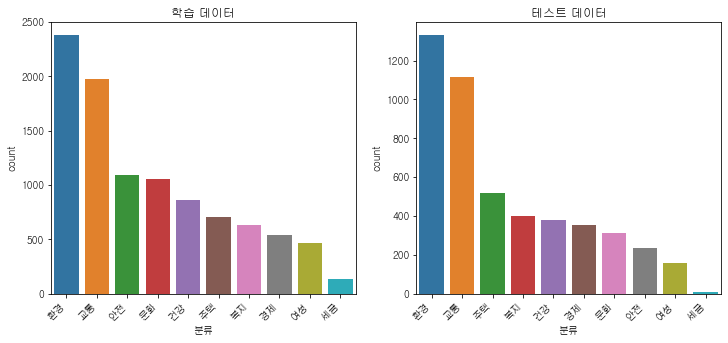

In [62]:
#학습 데이터 민원 분류 비율 vs 테스트 데이터 민원 분류 비율 #
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)

#학습 데이터 플롯
train_plot = sns.countplot(train_df['분류'], ax=axes[0],order=train_df['분류'].value_counts().index.to_list())
train_plot.set_xticklabels(train_plot.get_xticklabels(),rotation=45,ha='right')
train_plot.set_title('학습 데이터')

#테스트 데이터 플롯
test_plot = sns.countplot(output_w2v['분류'], ax=axes[1],order=result_df['분류'].value_counts().index.to_list())
test_plot.set_xticklabels(test_plot.get_xticklabels(),rotation=45,ha='right')
test_plot.set_title('테스트 데이터')